In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from tqdm import tqdm
from scipy.stats import norm

sns.set()

C:\Users\simon\AppData\Local\Temp\ipykernel_16296\2478109196.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Exp Params

# Load & Prepare Data
In this particular analysis we only care about data at the national assembly level

In [4]:
folder_name = "exp2a"
file_postfix = ""

data_path = f"data/{folder_name}"
figs_path = f"figs/{folder_name}"
data_path, figs_path

('data/exp2a', 'figs/exp2a')

## Load

In [5]:
NROWS = 10000

### Amended Formula

In [6]:
cols = pd.read_csv(f"{data_path}/nat_amend{file_postfix}.csv", nrows=10).columns
drop_cols = ["max_diff_seats", "mean_diff_seats", "min_diff_seats",	"max_diff_perc", 
             "mean_diff_perc", "min_diff_perc"]
use_cols = set(cols) - set(drop_cols)
use_cols = list(use_cols)
use_cols

['reg_votes',
 'abs_diff_seats',
 'diff_seats',
 'perc_seats',
 'is_ind',
 'tot_surplus',
 'tot_seats',
 'tot_ind_seats',
 'abs_diff_perc',
 'tot_votes',
 'tot_forf_seats',
 'perc_votes',
 'tot_rem_seats',
 'tot_party_seats',
 'opt_seats',
 'tot_party_votes',
 'is_forfeit',
 'seats',
 'votes',
 'forf_seats',
 'tot_forf_votes',
 'index',
 'diff_perc',
 'tot_ind_votes',
 'comp_votes']

In [8]:
amend_df = pd.read_csv(f"{data_path}/nat_amend{file_postfix}.csv", 
                       usecols=use_cols, nrows=NROWS)
# drop_cols = ["max_diff_seats", "mean_diff_seats", "min_diff_seats",	"max_diff_perc", 
#              "mean_diff_perc", "min_diff_perc"]
# amend_df.drop(drop_cols, inplace=True, axis=1)
amend_df.head()

,index,seats,forf_seats,tot_rem_seats,tot_surplus,is_ind,is_forfeit,reg_votes,comp_votes,votes,...,abs_diff_seats,abs_diff_perc,tot_party_seats,tot_party_votes,tot_forf_seats,tot_forf_votes,tot_ind_seats,tot_ind_votes,tot_seats,tot_votes
0,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,166|2|2|3|2|2|2|2|2|3|1|2|2|2|2|2|2|2|2|1|159|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,14|2|2|5|2|3|3|3|0|1|0|1|1|1|2|0|0|3|0|0|10|2|...,479715|170698|134314|179947|163434|139417|1312...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,4218743|68018|58922|83002|66202|47526|58164|37...,4218743|68018|58922|83002|66202|47526|58164|37...,8437486|136036|117844|166004|132404|95052|1163...,...,0.04161514306059644|0.6770577346855915|0.31905...,0.00010616107923616669|0.0017271880986877335|0...,392,19919672,0,0,8,1479866,400,21399538
1,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,2|2|3|2|2|2|3|2|2|2|2|1|4|4|2|2|328|2|1|2|1|2|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,2|2|5|3|3|3|3|2|1|2|0|0|0|2|2|2|10|1|0|2|0|1|0...,107233|129747|165807|118142|106165|116169|1346...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,49912|55050|63467|40955|51001|51031|56790|5126...,49912|55050|63467|40955|51001|51031|56790|5126...,99824|110100|126934|81910|102002|102062|113580...,...,0.28405689072983975|0.5191803941873232|0.09564...,0.0007321053884789689|0.0013380937994518644|0....,388,16957420,0,0,12,1514551,400,18471971
2,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,2|2|193|1|1|1|2|1|1|1|1|1|1|1|1|1|1|1|1|2|1|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,3|2|12|2|2|1|1|1|1|1|0|0|1|1|1|0|0|0|0|4|1|0|0...,184018|142990|398616|72310|91272|68308|119191|...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,70422|59929|4665765|30236|34947|29331|42009|19...,70422|59929|4665765|30236|34947|29331|42009|19...,140844|119858|9331530|60472|69894|58662|84018|...,...,0.9066495290299161|0.4735537136865444|0.421776...,0.002318796749437125|0.0012111348176126451|0.0...,391,18946214,0,0,9,1703726,400,20649940
3,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,16|12|27|9|15|23|21|10|11|10|20|12|10|9|10|13|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,5|8|10|3|7|7|6|3|5|6|10|5|5|3|5|2|7|4|2|9|4|7|...,318874|379331|421407|218115|343021|335643|3436...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,377086|267364|627007|194363|335777|521249|4921...,377086|267364|627007|194363|335777|521249|4921...,754172|534728|1254014|388726|671554|1042498|98...,...,0.47369035956258543|0.3197155309555626|0.39194...,0.0012053189810752735|0.0008135255240599541|0....,393,17991694,0,0,7,2704767,400,20696461
4,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,138|2|86|128|1|1|1|1|1|1|1|1|1|1|1|0|1|0|1|1|1...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,17|2|15|14|1|1|1|1|1|1|0|0|1|1|0|0|0|0|1|1|1|1...,632622|122458|725530|577307|67053|93149|107304...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,3615531|52868|2272514|3356953|28521|33460|3632...,3615531|52868|2272514|3356953|28521|33460|3632...,7231062|105736|4545028|6713906|57042|66920|726...,...,0.13134796158757922|0.015980473121870453|0.656...,0.00033592829050532735|4.087077524774982e-05|0...,391,20507528,0,0,9,1984063,400,22491591


In [9]:
amend_df.iloc[0, 0]

'0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|26|27|28|29|30|31|32|33|34|35|36|37|38|39|40|41|42|43|44|45|46'

### Original Formula

In [10]:
orig_df = pd.read_csv(f"{data_path}/nat_orig{file_postfix}.csv", nrows=NROWS)
drop_cols = ["max_diff_seats", "mean_diff_seats", "min_diff_seats",	"max_diff_perc", 
             "mean_diff_perc", "min_diff_perc"]
orig_df.drop(drop_cols, inplace=True, axis=1)
orig_df.head()

,party,votes,seats,forf_seats,tot_rem_seats,tot_surplus,is_forfeit,perc_votes,perc_seats,opt_seats,diff_seats,diff_perc,abs_diff_seats,abs_diff_perc
0,party_2|party_16|party_5|party_12|party_11|par...,4218743|68018|58922|83002|66202|47526|58164|37...,170|3|2|3|2|2|2|2|2|3|1|2|2|2|2|2|2|2|2|162|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,8|2|1|3|1|2|2|2|0|1|0|1|1|1|1|0|0|1|0|5|0|2|0|...,234116|86360|68168|91490|82728|70214|66652|492...,False|False|False|False|False|False|False|Fals...,0.42357554883433823|0.006829228915014264|0.005...,0.425|0.0075|0.005|0.0075|0.005|0.005|0.005|0....,169.43021953373528|2.7316915660057055|2.366384...,-0.5697804662647172|-0.2683084339942945|0.3663...,-0.0014244511656617553|-0.000670771084985736|0...,0.5697804662647172|0.2683084339942945|0.366384...,0.0014244511656617553|0.000670771084985736|0.0...
1,party_23|party_14|party_8|party_29|party_1|par...,49912|55050|63467|40955|7149084|51001|90499|51...,2|3|3|2|338|2|4|2|3|2|2|2|2|1|4|2|2|2|1|2|1|2|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,1|2|2|2|4|1|1|1|2|1|1|1|1|0|1|1|1|1|0|2|0|1|0|...,57536|67812|63502|60766|169857|59714|55791|597...,False|False|False|False|False|False|False|Fals...,0.005886744563736701|0.006492732974709596|0.00...,0.005|0.0075|0.0075|0.005|0.845|0.005|0.01|0.0...,2.3546978254946804|2.5970931898838385|2.994181...,0.35469782549468043|-0.4029068101161615|-0.005...,0.0008867445637367006|-0.0010072670252904035|-...,0.35469782549468043|0.4029068101161615|0.00581...,0.0008867445637367006|0.0010072670252904035|1....
2,party_21|party_3|party_28|party_40|party_6|par...,70422|59929|30236|34947|29331|42009|3577947|19...,3|2|1|1|1|2|151|1|1|1|1|1|1|1|1|1|1|1|1|2|1|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,3|1|1|1|1|2|6|1|1|1|0|0|1|1|1|0|0|0|0|3|1|0|0|...,93596|72610|36848|46270|35038|60394|209094|396...,False|False|False|False|False|False|False|Fals...,0.0074338862635036215|0.006326224331679142|0.0...,0.0075|0.005|0.0025|0.0025|0.0025|0.005|0.3775...,2.9735545054014487|2.530489732671657|1.2767088...,-0.026445494598551278|0.5304897326716569|0.276...,-6.611373649637823e-05|0.0013262243316791416|0...,0.026445494598551278|0.5304897326716569|0.2767...,6.611373649637823e-05|0.0013262243316791416|0....
3,party_6|party_17|party_7|party_11|party_26|par...,377086|267364|627007|492181|521249|194363|3357...,17|12|28|22|23|9|15|10|12|11|20|10|9|12|10|13|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,5|5|8|3|4|3|5|2|4|4|6|3|1|3|2|1|4|3|1|3|5|3|4|...,206987|194087|235770|161823|141681|151305|2175...,False|False|False|False|False|False|False|Fals...,0.0419177871744595|0.029720825620978213|0.0696...,0.0425|0.03|0.07|0.055|0.0575|0.0225|0.0375|0....,16.7671148697838|11.888330248391284|27.8798427...,-0.23288513021620005|-0.11166975160871573|-0.1...,-0.0005822128255405026|-0.00027917437902178627...,0.23288513021620005|0.11166975160871573|0.1201...,0.0005822128255405026|0.00027917437902178627|0...
4,party_2|party_29|party_8|party_34|party_11|par...,3356953|52868|28521|33460|36327|2272514|25449|...,131|2|1|1|1|88|1|1|1|1|1|1|1|1|0|1|0|1|1|1|1|1...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,4|1|1|1|1|6|1|1|1|0|0|1|1|0|0|0|0|1|1|1|1|1|1|...,210847|54594|31471|41349|47083|272557|50898|46...,False|False|False|False|False|False|False|Fals...,0.3273873867196475|0.005155960289314246|0.0027...,0.3275|0.005|0.0025|0.0025|0.0025|0.22|0.0025|...,130.95495468785901|2.0623841157256986|1.112606...,-0.04504531214098506|0.062384115725698575|0.11...,-0.00011261328035250262|0.0001559602893142463|...,0.04504531214098506|0.062384115725698575|0.112...,0.00011261328035250262|0.0001559602893142463|0...


## Analysis of Problem Runs

In [11]:
amend_df["tot_seats"].describe()

count    10000.0
mean       400.0
std          0.0
min        400.0
25%        400.0
50%        400.0
75%        400.0
max        400.0
Name: tot_seats, dtype: float64

In [12]:
prob_df = amend_df[amend_df["tot_seats"] != 400].copy()

agr_cols = ['tot_party_seats', 'tot_party_votes', 'tot_forf_seats', 'tot_forf_votes', 'tot_ind_seats', 
             'tot_ind_votes', 'tot_seats', 'tot_votes']

all_cols = ['index', 'seats', 'forf_seats', 'tot_rem_seats', 'tot_surplus',
            'is_ind', 'is_forfeit', 'reg_votes', 'comp_votes', 'votes',
            'perc_votes', 'perc_seats', 'opt_seats', 'diff_seats', 'diff_perc', 'abs_diff_seats', 'abs_diff_perc']

prob_agr_df = prob_df[agr_cols].copy()
prob_all_df = prob_df[all_cols].copy()

In [13]:
prob_agr_df.head()

,tot_party_seats,tot_party_votes,tot_forf_seats,tot_forf_votes,tot_ind_seats,tot_ind_votes,tot_seats,tot_votes


In [14]:
prob_all_df.head()

,index,seats,forf_seats,tot_rem_seats,tot_surplus,is_ind,is_forfeit,reg_votes,comp_votes,votes,perc_votes,perc_seats,opt_seats,diff_seats,diff_perc,abs_diff_seats,abs_diff_perc


In [18]:
def row_to_df(row):
    df_dict = {key: val.split("|") for key,val in row.items()}
    df = pd.DataFrame.from_dict(df_dict)
    df.rename({"index": "party"}, axis=1, inplace=True) 
    df.set_index("party", inplace=True)
    return df

### Load Corresponding Ballot

In [ ]:
def load_bal(bal_ind):
    bal_df = pd.read_csv(f"{data_path}/ballot/ballot_{bal_ind}.csv")
    regs = list(bal_df["region"].unique())
    
    reg_bals = {}
    for reg in regs:
        reg_bals[reg] = bal_df[bal_df["region"]==reg]

    tot_bal_df = reg_bals[regs[0]].copy()
    tot_bal_df.set_index("party", inplace=True)
    tot_bal_df["votes"] = bal_df[["party", "votes"]].groupby("party").sum()
    tot_bal_df.head()

    return bal_df, reg_bals, tot_bal_df

In [ ]:
bal_df, reg_bals, tot_bal_df = load_bal(ind)
bal_df.head()

In [ ]:
reg_bals["gp"].head()

In [ ]:
tot_bal_df.head()

In [ ]:
tot_bal_df["votes"].sum()

# Prepare Data

In [19]:
def row_to_df(row):
    df_dict = {key: val.split("|") for key,val in row.items()}
    df = pd.DataFrame.from_dict(df_dict)
    df.set_index("party", inplace=True)
    return df

In [20]:
bool_map = {
    "True": True,
    "False": False
}

In [21]:
agr_cols = ['tot_party_seats', 'tot_party_votes', 'tot_forf_seats', 'tot_forf_votes', 'tot_ind_seats', 
             'tot_ind_votes', 'tot_seats', 'tot_votes']

all_cols = ['index', 'seats', 'forf_seats', 'tot_rem_seats', 'tot_surplus',
            'is_ind', 'is_forfeit', 'reg_votes', 'comp_votes', 'votes',
            'perc_votes', 'perc_seats', 'opt_seats', 'diff_seats', 'diff_perc', 'abs_diff_seats', 'abs_diff_perc']

amend_agr_df = amend_df[agr_cols].copy()
amend_all_df = amend_df[all_cols].copy()

amend_all_df.rename({"index": "party"}, inplace=True, axis=1)

In [22]:
amend_all_df.head()

,party,seats,forf_seats,tot_rem_seats,tot_surplus,is_ind,is_forfeit,reg_votes,comp_votes,votes,perc_votes,perc_seats,opt_seats,diff_seats,diff_perc,abs_diff_seats,abs_diff_perc
0,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,166|2|2|3|2|2|2|2|2|3|1|2|2|2|2|2|2|2|2|1|159|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,14|2|2|5|2|3|3|3|0|1|0|1|1|1|2|0|0|3|0|0|10|2|...,479715|170698|134314|179947|163434|139417|1312...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,4218743|68018|58922|83002|66202|47526|58164|37...,4218743|68018|58922|83002|66202|47526|58164|37...,8437486|136036|117844|166004|132404|95052|1163...,0.42357554883433823|0.006829228915014264|0.005...,0.42346938775510207|0.00510204081632653|0.0051...,166.0416151430606|2.6770577346855915|2.3190566...,0.04161514306059644|0.6770577346855915|0.31905...,0.00010616107923616669|0.0017271880986877335|0...,0.04161514306059644|0.6770577346855915|0.31905...,0.00010616107923616669|0.0017271880986877335|0...
1,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,2|2|3|2|2|2|3|2|2|2|2|1|4|4|2|2|328|2|1|2|1|2|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,2|2|5|3|3|3|3|2|1|2|0|0|0|2|2|2|10|1|0|2|0|1|0...,107233|129747|165807|118142|106165|116169|1346...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,49912|55050|63467|40955|51001|51031|56790|5126...,49912|55050|63467|40955|51001|51031|56790|5126...,99824|110100|126934|81910|102002|102062|113580...,0.005886744563736701|0.006492732974709596|0.00...,0.005154639175257732|0.005154639175257732|0.00...,2.2840568907298398|2.519180394187323|2.9043564...,0.28405689072983975|0.5191803941873232|-0.0956...,0.0007321053884789689|0.0013380937994518644|-0...,0.28405689072983975|0.5191803941873232|0.09564...,0.0007321053884789689|0.0013380937994518644|0....
2,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,2|2|193|1|1|1|2|1|1|1|1|1|1|1|1|1|1|1|1|2|1|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,3|2|12|2|2|1|1|1|1|1|0|0|1|1|1|0|0|0|0|4|1|0|0...,184018|142990|398616|72310|91272|68308|119191|...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,70422|59929|4665765|30236|34947|29331|42009|19...,70422|59929|4665765|30236|34947|29331|42009|19...,140844|119858|9331530|60472|69894|58662|84018|...,0.0074338862635036215|0.006326224331679142|0.4...,0.005115089514066497|0.005115089514066497|0.49...,2.906649529029916|2.4735537136865444|192.57822...,0.9066495290299161|0.4735537136865444|-0.42177...,0.002318796749437125|0.0012111348176126451|-0....,0.9066495290299161|0.4735537136865444|0.421776...,0.002318796749437125|0.0012111348176126451|0.0...
3,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,16|12|27|9|15|23|21|10|11|10|20|12|10|9|10|13|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,5|8|10|3|7|7|6|3|5|6|10|5|5|3|5|2|7|4|2|9|4|7|...,318874|379331|421407|218115|343021|335643|3436...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,377086|267364|627007|194363|335777|521249|4921...,377086|267364|627007|194363|335777|521249|4921...,754172|534728|1254014|388726|671554|1042498|98...,0.0419177871744595|0.029720825620978213|0.0696...,0.04071246819338423|0.030534351145038167|0.068...,16.473690359562585|11.680284469044437|27.39194...,0.47369035956258543|-0.3197155309555626|0.3919...,0.0012053189810752735|-0.0008135255240599541|0...,0.47369035956258543|0.3197155309555626|0.39194...,0.0012053189810752735|0.0008135255240599541|0....
4,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,138|2|86|128|1|1|1|1|1|1|1|1|1|1|1|0|1|0|1|1|1...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,17|2|15|14|1|1|1|1|1|1|0|0|1|1|0|0|0|0|1|1|1|1...,632622|122458|725530|577307|67053|93149|107304...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,3615531|52868|2272514|3356953|28521|33460|3632...,3615531|52868

In [23]:
df = row_to_df(amend_all_df.iloc[1])
df["votes"] = df["votes"].astype(int)
df["seats"] = df["seats"].astype(int)
df["is_ind"] = df["is_ind"].astype(bool)
df.head()

,seats,forf_seats,tot_rem_seats,tot_surplus,is_ind,is_forfeit,reg_votes,comp_votes,votes,perc_votes,perc_seats,opt_seats,diff_seats,diff_perc,abs_diff_seats,abs_diff_perc
party,,,,,,,,,,,,,,,,
0,2,0,2,107233,True,False,49912,49912,99824,0.005886744563736701,0.005154639175257732,2.2840568907298398,0.28405689072983975,0.0007321053884789689,0.28405689072983975,0.0007321053884789689
1,2,0,2,129747,True,False,55050,55050,110100,0.006492732974709596,0.005154639175257732,2.519180394187323,0.5191803941873232,0.0013380937994518644,0.5191803941873232,0.0013380937994518644
2,3,0,5,165807,True,False,63467,63467,126934,0.00748545474488454,0.007731958762886598,2.9043564410152016,-0.09564355898479837,-0.000246504018002058,0.09564355898479837,0.000246504018002058
3,2,0,3,118142,True,False,40955,40955,81910,0.004830333859749891,0.005154639175257732,1.8741695375829577,-0.12583046241704232,-0.00032430531550784077,0.12583046241704232,0.00032430531550784077
4,2,0,3,106165,True,False,51001,51001,102002,0.006015183913590629,0.005154639175257732,2.333891358473164,0.333891358473164,0.000860544738332897,0.333891358473164,0.000860544738332897


In [24]:
(df["seats"] > 1).any()

True

In [25]:
df[["votes", "seats"]].describe()

,votes,seats
count,4.300000e+01,43.000000
mean,4.295807e+05,9.302326
std,2.165749e+06,49.763983
min,2.933800e+04,1.000000
25%,6.519800e+04,1.000000
50%,9.982400e+04,2.000000
75%,1.150515e+05,2.000000
max,1.429817e+07,328.000000


<Axes: xlabel='votes', ylabel='party'>

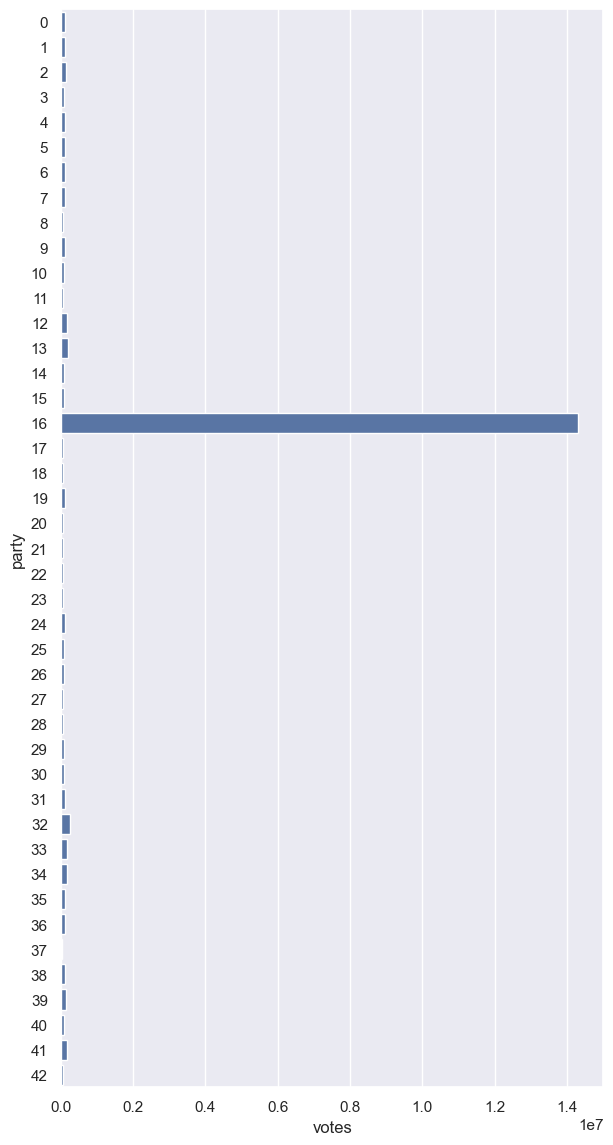

In [26]:
fig, ax = plt.subplots(1, figsize=(7, 14))
sns.barplot(data=df.reset_index(), y="party", x="votes", ax=ax)

In [27]:
ind = 150
df = row_to_df(amend_all_df.iloc[ind])
df[df["is_ind"] == True]

,seats,forf_seats,tot_rem_seats,tot_surplus,is_ind,is_forfeit,reg_votes,comp_votes,votes,perc_votes,perc_seats,opt_seats,diff_seats,diff_perc,abs_diff_seats,abs_diff_perc
party,,,,,,,,,,,,,,,,


In [28]:
# fig, axs = plt.subplots(2, 1, figsize=(10, 10))
# sns.barplot(data=df.reset_index(), x="party", y="votes", ax=)


In [29]:
# tot_seats = [row_to_df(amend_df.iloc[i])["seats"].astype(int).sum() for i in range(amend_df.shape[0])]
# tot_seats

In [30]:
# sns.histplot(x=tot_seats)

In [31]:
orig_tot_seats = [row_to_df(orig_df.iloc[i])["seats"].astype(int).sum() for i in range(amend_df.shape[0])]
orig_tot_seats[:5]

[400, 400, 400, 400, 400]

<Axes: ylabel='Count'>

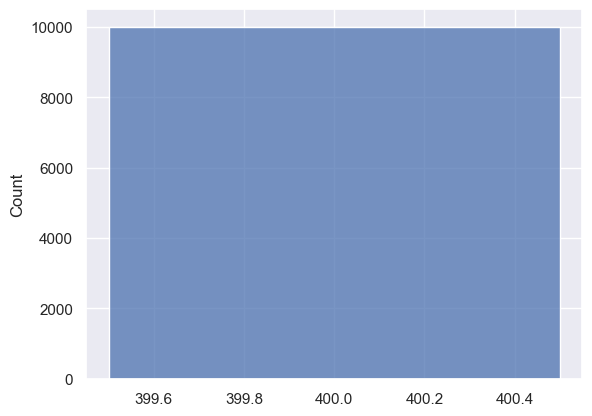

In [32]:
sns.histplot(x=orig_tot_seats)

### Ammended

In [33]:
amend_cols = ["votes", "seats", "is_ind", "is_forfeit"]
amend_type_dict = {
    "votes": "int", 
    "seats": "int",  
    "is_forfeit": "str",
    "is_ind": "str"
}

#### Only Parties

I.e. inter-party proportionality

In [34]:
def prep_amend_p(df):
    p_df = df[amend_cols].astype(amend_type_dict)
    p_df["is_forfeit"] = p_df["is_forfeit"].map(bool_map)
    p_df["is_ind"] = p_df["is_ind"].map(bool_map)
    p_df = p_df[p_df["is_ind"]==False]
    
    # print(p_df.info())
    
    # All Cands
    tot_votes = p_df["votes"].sum()
    tot_seats = p_df["seats"].sum()
    
    p_df["vote_perc"] = p_df["votes"]/tot_votes
    p_df["seat_perc"] = p_df["seats"]/tot_seats
    
    p_df["opt_seats"] = p_df["vote_perc"] * tot_seats
    p_df["seat_diff"] = p_df["opt_seats"] - p_df["seats"]
    
    return p_df

In [35]:
tmp = row_to_df(amend_all_df.iloc[0])
ex_amend_p_df = prep_amend_p(tmp)
ex_amend_p_df

,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
party,,,,,,,,
0,8437486,166,False,False,0.423576,0.423469,166.041615,0.041615
1,136036,2,False,False,0.006829,0.005102,2.677058,0.677058
2,117844,2,False,False,0.005916,0.005102,2.319057,0.319057
3,166004,3,False,False,0.008334,0.007653,3.266799,0.266799
4,132404,2,False,False,0.006647,0.005102,2.605583,0.605583
5,95052,2,False,False,0.004772,0.005102,1.870532,-0.129468
6,116328,2,False,False,0.005840,0.005102,2.289223,0.289223
7,74118,2,False,False,0.003721,0.005102,1.458571,-0.541429
8,102964,2,False,False,0.005169,0.005102,2.026233,0.026233


#### All

In [36]:
def prep_amend_all(df):
    df = df[amend_cols].astype(amend_type_dict)
    df["is_forfeit"] = df["is_forfeit"].map(bool_map)
    df["is_ind"] = df["is_ind"].map(bool_map)
    
    # All Cands
    tot_votes = df["votes"].sum()
    tot_seats = df["seats"].sum()
    
    df["vote_perc"] = df["votes"]/tot_votes
    df["seat_perc"] = df["seats"]/tot_seats
    
    df["opt_seats"] = df["vote_perc"] * tot_seats
    df["seat_diff"] = df["opt_seats"] - df["seats"]
    
    return df

In [37]:
tmp = row_to_df(amend_all_df.iloc[0])
ex_amend_all_df = prep_amend_all(tmp)
ex_amend_all_df

,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
party,,,,,,,,
0,8437486,166,False,False,0.394284,0.4150,157.713424,-8.286576
1,136036,2,False,False,0.006357,0.0050,2.542784,0.542784
2,117844,2,False,False,0.005507,0.0050,2.202739,0.202739
3,166004,3,False,False,0.007757,0.0075,3.102945,0.102945
4,132404,2,False,False,0.006187,0.0050,2.474895,0.474895
5,95052,2,False,False,0.004442,0.0050,1.776711,-0.223289
6,116328,2,False,False,0.005436,0.0050,2.174402,0.174402
7,74118,2,False,False,0.003464,0.0050,1.385413,-0.614587
8,102964,2,False,False,0.004812,0.0050,1.924602,-0.075398


In [38]:
tot_amend_votes = ex_amend_all_df["votes"].sum()
tot_amend_votes

21399538

### Original

In [39]:
orig_cols = ["votes", "seats", "is_forfeit"]
orig_type_dict = {
    "votes": "int", 
    "seats": "int",  
    "is_forfeit": "str"
}

In [40]:
def prep_orig(df):
    df = df[orig_cols].astype(orig_type_dict)
    df["is_forfeit"] = df["is_forfeit"].map(bool_map)
    
    # All Cands
    tot_votes = df["votes"].sum()
    tot_seats = df["seats"].sum()
    
    df["vote_perc"] = df["votes"]/tot_votes
    df["seat_perc"] = df["seats"]/tot_seats
    
    df["opt_seats"] = df["vote_perc"] * tot_seats
    df["seat_diff"] = df["opt_seats"] - df["seats"]
    
    return df

In [41]:
tmp = row_to_df(orig_df.iloc[0])
ex_orig_df = prep_orig(tmp)
ex_orig_df

,votes,seats,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
party,,,,,,,
party_2,4218743,170,False,0.423576,0.4250,169.430220,-0.569780
party_16,68018,3,False,0.006829,0.0075,2.731692,-0.268308
party_5,58922,2,False,0.005916,0.0050,2.366384,0.366384
party_12,83002,3,False,0.008334,0.0075,3.333469,0.333469
party_11,66202,2,False,0.006647,0.0050,2.658759,0.658759
party_18,47526,2,False,0.004772,0.0050,1.908706,-0.091294
party_13,58164,2,False,0.005840,0.0050,2.335942,0.335942
party_24,37059,2,False,0.003721,0.0050,1.488338,-0.511662
party_34,51482,2,False,0.005169,0.0050,2.067584,0.067584


In [42]:
tot_orig_votes = ex_orig_df["votes"].sum()
tot_orig_votes

9959836

## Combine DFs

### Amended

#### Only Parties

In [43]:
n_rows = amend_all_df.shape[0]
dfs_arr = [prep_amend_p(row_to_df(amend_all_df.iloc[i])).reset_index() for i in range(n_rows)]
agr_arrs = [[df["seat_diff"].min(), df["seat_diff"].mean(), df["seat_diff"].max()] for df in dfs_arr] 
agr_amend_p_df = pd.DataFrame(agr_arrs, columns=["min", "mean", "max"])
all_amend_p_df = pd.concat(dfs_arr, ignore_index=True)
print(f"Shape: {all_amend_p_df.shape}")
all_amend_p_df.head()

Shape: (399801, 9)


,party,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
0,0,8437486,166,False,False,0.423576,0.423469,166.041615,0.041615
1,1,136036,2,False,False,0.006829,0.005102,2.677058,0.677058
2,2,117844,2,False,False,0.005916,0.005102,2.319057,0.319057
3,3,166004,3,False,False,0.008334,0.007653,3.266799,0.266799
4,4,132404,2,False,False,0.006647,0.005102,2.605583,0.605583


In [44]:
agr_amend_p_df.head()

,min,mean,max
0,-0.630614,1.708035e-17,0.722802
1,-0.845917,-3.259042e-16,0.572539
2,-0.574540,5.314897e-16,0.906650
3,-0.545122,2.049643e-16,0.511053
4,-0.659707,-2.359224e-16,0.847606


#### All

In [45]:
n_rows = amend_all_df.shape[0]
dfs_arr = [prep_amend_all(row_to_df(amend_all_df.iloc[i])).reset_index() for i in range(n_rows)]
agr_arrs = [[df["seat_diff"].min(), df["seat_diff"].mean(), df["seat_diff"].max()] for df in dfs_arr] 
agr_amend_all_df = pd.DataFrame(agr_arrs, columns=["min", "mean", "max"])
all_amend_all_df = pd.concat(dfs_arr, ignore_index=True)
print(f"Shape: {all_amend_all_df.shape}")
all_amend_all_df.head()

Shape: (481780, 9)


,party,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
0,0,8437486,166,False,False,0.394284,0.4150,157.713424,-8.286576
1,1,136036,2,False,False,0.006357,0.0050,2.542784,0.542784
2,2,117844,2,False,False,0.005507,0.0050,2.202739,0.202739
3,3,166004,3,False,False,0.007757,0.0075,3.102945,0.102945
4,4,132404,2,False,False,0.006187,0.0050,2.474895,0.474895


In [46]:
# all_amend_all_df.to_csv(f"{data_path}/all_amend_all.csv", index=False)

# agr_amend_all_df.to_csv(f"{data_path}/agr_amend_all.csv", index=False)

### Original

In [47]:
# # agr_orig_df.to_csv(f"{data_path}/agr_orig.csv", index=False)
# agr_orig_df = pd.read_csv(f"{data_path}/agr_orig.csv")
# agr_orig_df.head()

In [48]:
# all_orig_df = pd.read_csv(f"{data_path}/all_orig.csv")
# all_orig_df.head()

In [49]:
n_rows = orig_df.shape[0]
dfs_arr = [prep_orig(row_to_df(orig_df.iloc[i])).reset_index() for i in range(n_rows)]
agr_arrs = [[df["seat_diff"].min(), df["seat_diff"].mean(), df["seat_diff"].max()] for df in dfs_arr] 
agr_orig_df = pd.DataFrame(agr_arrs, columns=["min", "mean", "max"])
all_orig_df = pd.concat(dfs_arr, ignore_index=True)
print(f"Shape: {all_orig_df.shape}")
all_orig_df.head()

Shape: (399801, 8)


,party,votes,seats,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
0,party_2,4218743,170,False,0.423576,0.4250,169.430220,-0.569780
1,party_16,68018,3,False,0.006829,0.0075,2.731692,-0.268308
2,party_5,58922,2,False,0.005916,0.0050,2.366384,0.366384
3,party_12,83002,3,False,0.008334,0.0075,3.333469,0.333469
4,party_11,66202,2,False,0.006647,0.0050,2.658759,0.658759


In [50]:
# agr_orig_df.to_csv(f"{data_path}/agr_orig.csv", index=False)

# all_orig_df.to_csv(f"{data_path}/all_orig.csv", index=False)

# Analysis

## Common Fuctions

In [51]:
def calc_stats(x):
    stats = {
        "min": x.min(),
        "mean": x.mean(),
        "max": x.max()
    }
    return stats

## Proportionality
Here optimal seats is calculated using both the parties and independents.

#### All

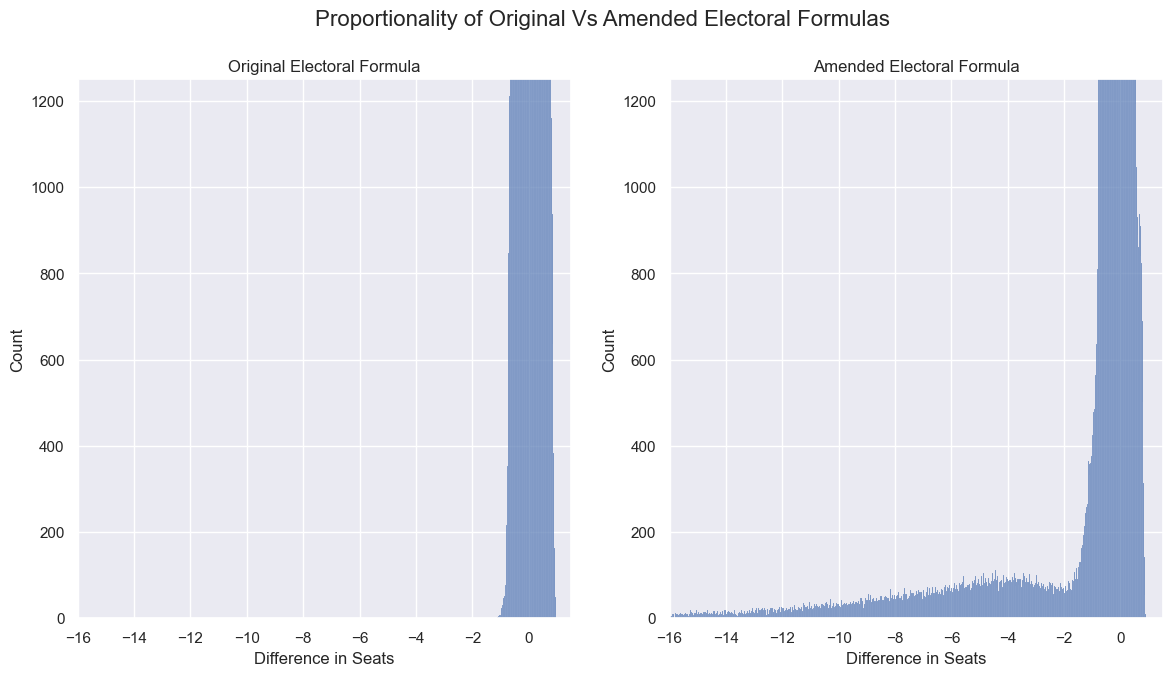

In [53]:
amend_all_data = all_amend_all_df
orig_all_data = all_orig_df
amend_all_data = amend_all_data[amend_all_data["is_ind"]==False]

fig, axs = plt.subplots(1,2, figsize=(14, 7))

fig.suptitle('Proportionality of Original Vs Amended Electoral Formulas', fontsize=16)

for ax in axs:
    ax.set_xlim(-16, 1.5)
    ax.set_ylim(0, 1250)
    ax.set_xlabel("Difference in Seats")

axs[0].set_title("Original Electoral Formula")
axs[1].set_title("Amended Electoral Formula")
    
hist_kwargs = {"binwidth":0.025}

sns.histplot(orig_all_data["seat_diff"], ax=axs[0], **hist_kwargs)
sns.histplot(amend_all_data["seat_diff"], ax=axs[1], **hist_kwargs)

fig.savefig(f"{figs_path}/prop.png")

In [54]:
sd_orig_stats = calc_stats(orig_all_data["seat_diff"])
sd_amend_stats = calc_stats(amend_all_data["seat_diff"])

no_dec = 3

print("Original:")
print(f"\t min: {sd_orig_stats['min'].round(no_dec)}, mean: {sd_orig_stats['mean'].round(no_dec)}, max: {sd_orig_stats['max'].round(no_dec)}")

print("Ammended:")
print(f"\t min: {sd_amend_stats['min'].round(no_dec)}, mean: {sd_amend_stats['mean'].round(no_dec)}, max: {sd_amend_stats['max'].round(no_dec)}")

Original:
	 min: -1.143, mean: 0.0, max: 0.981
Ammended:
	 min: -51.673, mean: -0.71, max: 0.911


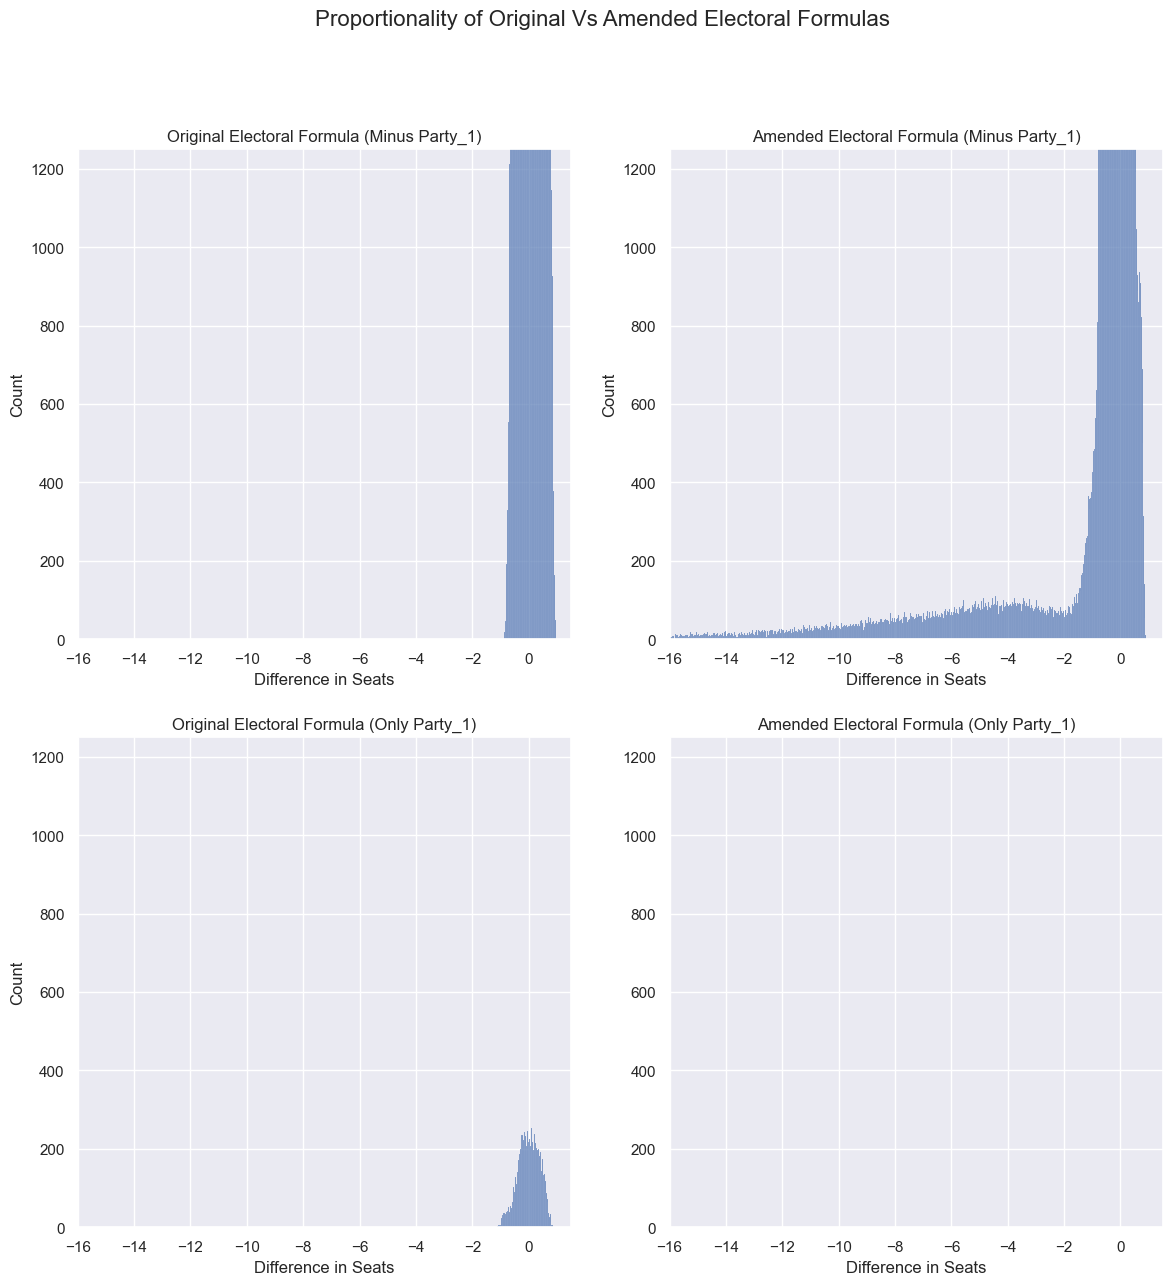

In [55]:
y_max = 1250

fig, axs = plt.subplots(2,2, figsize=(14, 14))

fig.suptitle('Proportionality of Original Vs Amended Electoral Formulas', fontsize=16)

hist_kwargs = {"binwidth":0.025}

amend_all_data = all_amend_all_df[all_amend_all_df["party"]!="party_1"]
orig_all_data = all_orig_df[all_orig_df["party"]!="party_1"]
amend_all_data = amend_all_data[amend_all_data["is_ind"]==False]

for ax in axs[0]:
    ax.set_xlim(-16, 1.5)
    ax.set_ylim(0, y_max)
    ax.set_xlabel("Difference in Seats")

axs[0][0].set_title("Original Electoral Formula (Minus Party_1)")
axs[0][1].set_title("Amended Electoral Formula (Minus Party_1)")

sns.histplot(orig_all_data["seat_diff"], ax=axs[0][0], **hist_kwargs)
sns.histplot(amend_all_data["seat_diff"], ax=axs[0][1], **hist_kwargs)

amend_all_data = all_amend_all_df[all_amend_all_df["party"]=="party_1"]
orig_all_data = all_orig_df[all_orig_df["party"]=="party_1"]
amend_all_data = amend_all_data[amend_all_data["is_ind"]==False]

for ax in axs[1]:
    ax.set_xlim(-16, 1.5)
    ax.set_ylim(0, y_max)
    ax.set_xlabel("Difference in Seats")

axs[1][0].set_title("Original Electoral Formula (Only Party_1)")
axs[1][1].set_title("Amended Electoral Formula (Only Party_1)")

sns.histplot(orig_all_data["seat_diff"], ax=axs[1][0], **hist_kwargs)
sns.histplot(amend_all_data["seat_diff"], ax=axs[1][1], **hist_kwargs)

fig.savefig(f"{figs_path}/prop_dec.png")

#### Agr

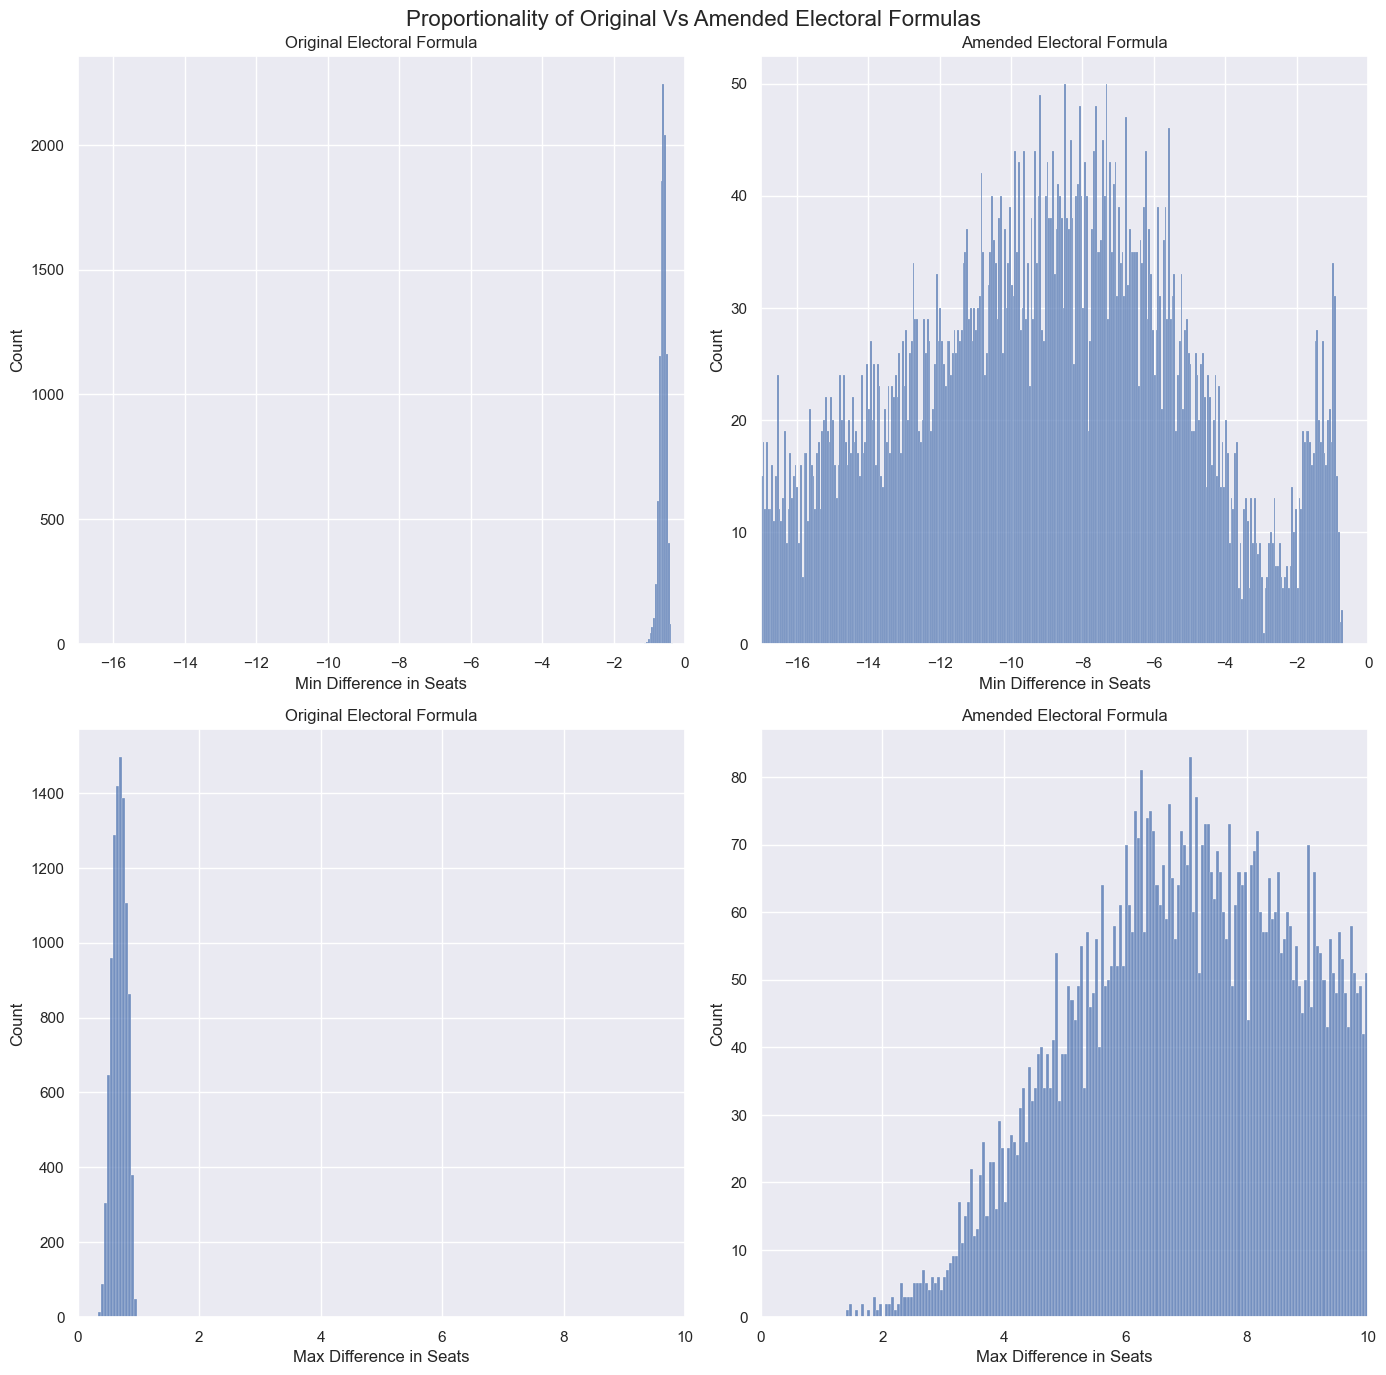

In [56]:
amend_data = agr_amend_all_df
orig_data = agr_orig_df

fig, axs = plt.subplots(2, 2, figsize=(14, 14))

fig.suptitle('Proportionality of Original Vs Amended Electoral Formulas', fontsize=16)

for ax in axs[0]:
    ax.set_xlim(-17, 0)
    # ax.set_ylim(0, 80000)
    ax.set_xlabel("Min Difference in Seats")
    
# for ax in axs[1]:
#     # ax.set_xlim(-16, 1.5)
#     # ax.set_ylim(0, 80000)
#     ax.set_xlabel("Mean Difference in Seats")
    
for ax in axs[1]:
    ax.set_xlim(0, 10)
    # ax.set_ylim(0, 80000)
    ax.set_xlabel("Max Difference in Seats")

for i in range(2):
    axs[i][0].set_title("Original Electoral Formula")
    axs[i][1].set_title("Amended Electoral Formula")
    
hist_kwargs = {"binwidth":0.05}
sns.histplot(orig_data["min"], ax=axs[0][0], **hist_kwargs)
sns.histplot(amend_data["min"], ax=axs[0][1], **hist_kwargs)

hist_kwargs = {"binwidth":0.05}
sns.histplot(orig_data["max"], ax=axs[1][0], **hist_kwargs)
sns.histplot(amend_data["max"], ax=axs[1][1], **hist_kwargs)

# sns.histplot(orig_data["mean"], ax=axs[1][0]) #, binwidth=0.001)
# sns.histplot(amend_data["mean"], ax=axs[1][1]) #, binwidth=0.001)

# sns.histplot(amend_all_data["seat_diff"], ax=axs[1], **hist_kwargs)

plt.tight_layout(pad=1)
fig.savefig(f"{figs_path}/agr_prop.png")

In [57]:
no_dec = 3

print("Original:")
for val in ["min", "mean", "max"]:
    data = orig_data[val]
    print(f"\t {val} -> min: {data.min().round(no_dec)}, mean: {data.mean().round(no_dec)}, max: {data.max().round(no_dec)}")

print("Amended:")
for val in ["min", "mean", "max"]:
    data = amend_data[val]
    print(f"\t {val} -> min: {data.min().round(no_dec)}, mean: {data.mean().round(no_dec)}, max: {data.max().round(no_dec)}")

Original:
	 min -> min: -1.143, mean: -0.619, max: -0.327
	 mean -> min: -0.0, mean: 0.0, max: 0.0
	 max -> min: 0.342, mean: 0.692, max: 0.981
Amended:
	 min -> min: -51.673, mean: -12.126, max: -0.699
	 mean -> min: -0.0, mean: -0.0, max: 0.0
	 max -> min: 1.397, mean: 8.803, max: 30.649


## Inter-Party Proportionality
Optimal seats for amended formula is only calculated using parties 

#### All

In [77]:
YMAX = 12500

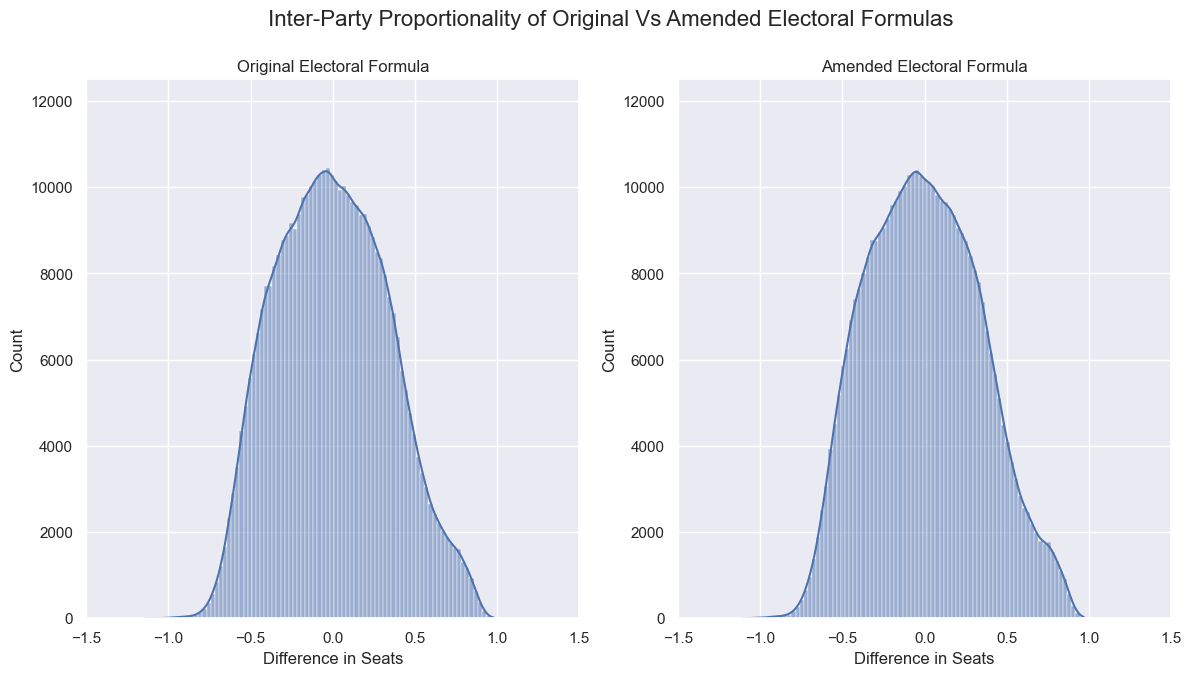

In [78]:
y_max = YMAX

amend_all_data = all_amend_p_df
orig_all_data = all_orig_df
amend_all_data = amend_all_data[amend_all_data["is_ind"]==False]

fig, axs = plt.subplots(1,2, figsize=(14, 7))

fig.suptitle('Inter-Party Proportionality of Original Vs Amended Electoral Formulas', fontsize=16)

for ax in axs:
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(0, y_max)

axs[0].set_xlabel("Difference in Seats")
axs[1].set_xlabel("Difference in Seats")

axs[0].set_title("Original Electoral Formula")
axs[1].set_title("Amended Electoral Formula")
    
hist_kwargs = {"binwidth":0.025, "kde": True}

sns.histplot(orig_all_data["seat_diff"], ax=axs[0], **hist_kwargs)
sns.histplot(amend_all_data["seat_diff"], ax=axs[1], **hist_kwargs)

fig.savefig(f"{figs_path}/ip_prop.png")

In [79]:
sd_orig_stats = calc_stats(orig_all_data["seat_diff"])
sd_amend_stats = calc_stats(amend_all_data["seat_diff"])

no_dec = 3

print("Original:")
print(f"\t min: {sd_orig_stats['min'].round(no_dec)}, mean: {sd_orig_stats['mean'].round(no_dec)}, max: {sd_orig_stats['max'].round(no_dec)}")

print("Ammended:")
print(f"\t min: {sd_amend_stats['min'].round(no_dec)}, mean: {sd_amend_stats['mean'].round(no_dec)}, max: {sd_amend_stats['max'].round(no_dec)}")

Original:
	 min: -1.143, mean: 0.0, max: 0.981
Ammended:
	 min: -1.111, mean: 0.0, max: 0.967


In [80]:
x1 = orig_all_data["seat_diff"]
mu1, std1 = norm.fit(x1)
mu1, std1

(1.2518441412128047e-18, 0.3434443138652234)

In [81]:
x2 = amend_all_data["seat_diff"]
mu2, std2 = norm.fit(x2)
mu2, std2

(4.003790778173518e-18, 0.34522739355333226)

In [82]:
print("Distributions")
print(f"Original: mu: {mu1}, std: {std1}")
print(f"Amended: mu: {mu2}, std: {std2}")
print(f"Difference: mu: {round(mu1 - mu2, 4)}, std: {round(std1 - std2, 4)}")

Distributions
Original: mu: 1.2518441412128047e-18, std: 0.3434443138652234
Amended: mu: 4.003790778173518e-18, std: 0.34522739355333226
Difference: mu: -0.0, std: -0.0018


##### Abs

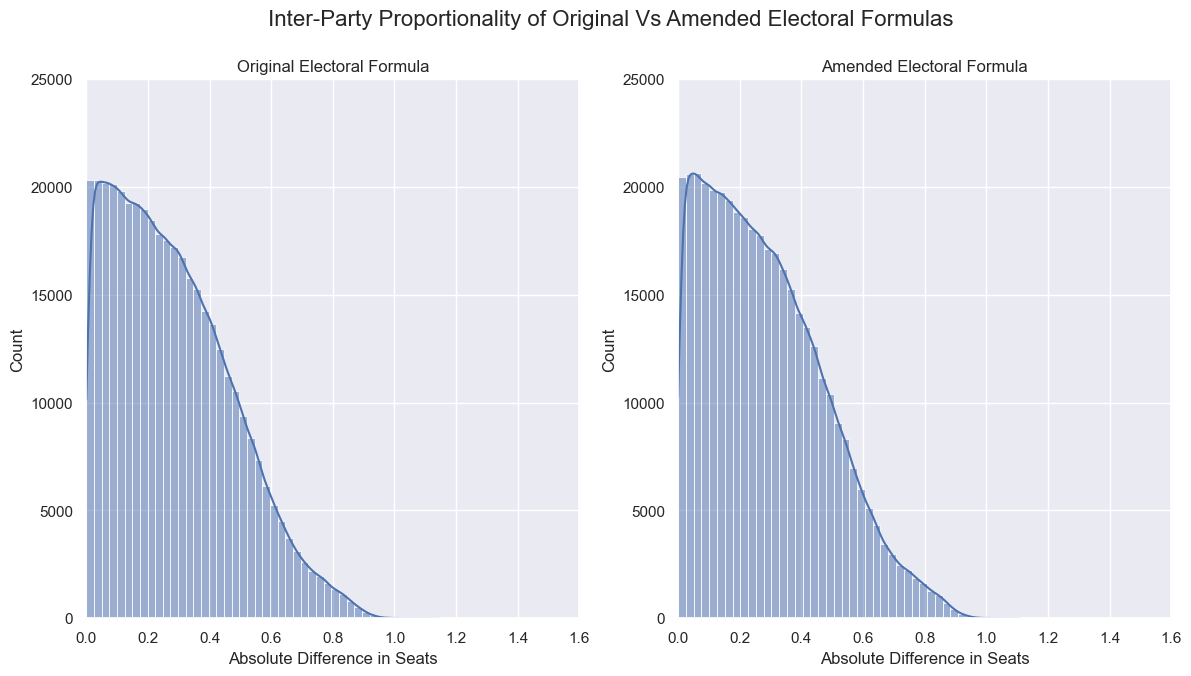

In [83]:
y_max = YMAX * 2

amend_all_data = all_amend_p_df
orig_all_data = all_orig_df
amend_all_data = amend_all_data[amend_all_data["is_ind"]==False]

fig, axs = plt.subplots(1,2, figsize=(14, 7))

fig.suptitle('Inter-Party Proportionality of Original Vs Amended Electoral Formulas', fontsize=16)

for ax in axs:
    ax.set_xlim(0, 1.6)
    ax.set_ylim(0, y_max)

axs[0].set_xlabel("Absolute Difference in Seats")
axs[1].set_xlabel("Absolute Difference in Seats")

axs[0].set_title("Original Electoral Formula")
axs[1].set_title("Amended Electoral Formula")
    
hist_kwargs = {"binwidth":0.025, "kde": True}

sns.histplot(orig_all_data["seat_diff"].abs(), ax=axs[0], **hist_kwargs)
sns.histplot(amend_all_data["seat_diff"].abs(), ax=axs[1], **hist_kwargs)

fig.savefig(f"{figs_path}/ip_prop_abs.png")

In [84]:
sd_orig_stats = calc_stats(orig_all_data["seat_diff"].abs())
sd_amend_stats = calc_stats(amend_all_data["seat_diff"].abs())

no_dec = 3

print("Original:")
print(f"\t min: {sd_orig_stats['min'].round(no_dec)}, mean: {sd_orig_stats['mean'].round(no_dec)}, max: {sd_orig_stats['max'].round(no_dec)}")

print("Ammended:")
print(f"\t min: {sd_amend_stats['min'].round(no_dec)}, mean: {sd_amend_stats['mean'].round(no_dec)}, max: {sd_amend_stats['max'].round(no_dec)}")

Original:
	 min: 0.0, mean: 0.283, max: 1.143
Ammended:
	 min: 0.0, mean: 0.285, max: 1.111


#### Agr

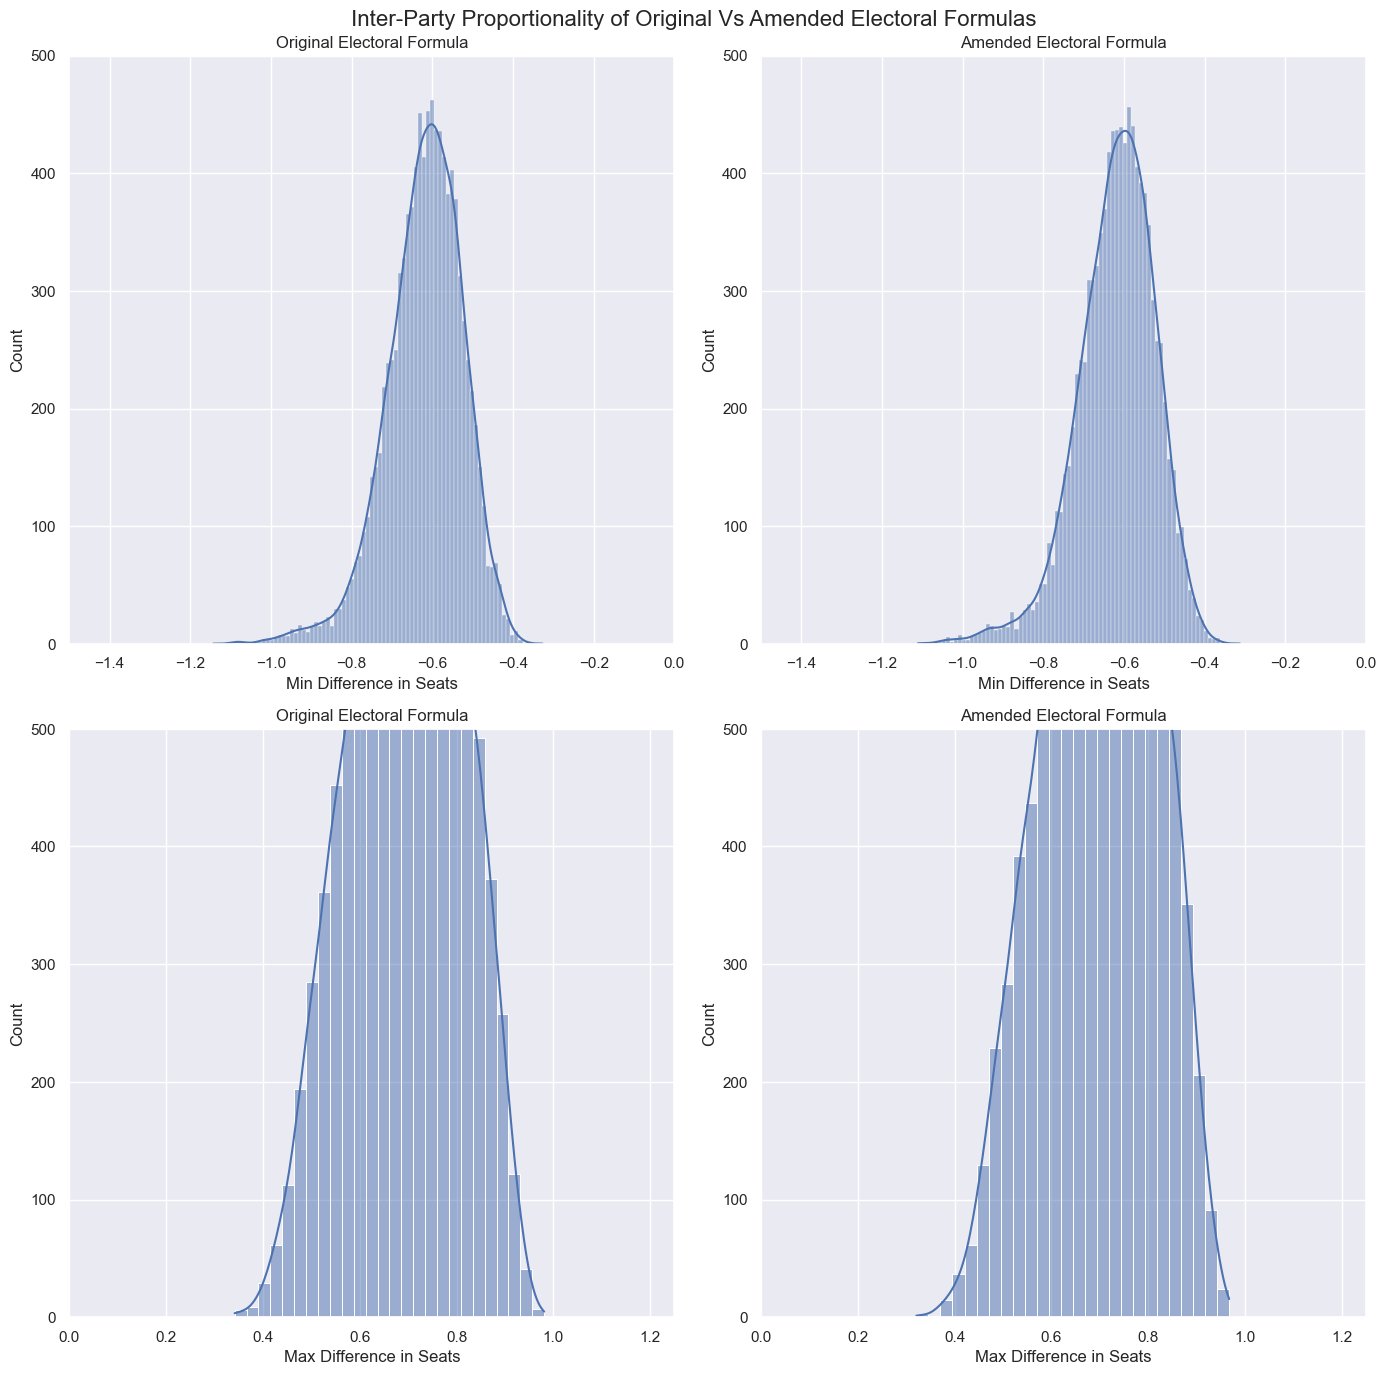

In [89]:
y_max = 500

amend_data = agr_amend_p_df
orig_data = agr_orig_df

fig, axs = plt.subplots(2, 2, figsize=(14, 14))

fig.suptitle('Inter-Party Proportionality of Original Vs Amended Electoral Formulas', fontsize=16)

for ax in axs[0]:
    ax.set_xlim(-1.5, 0)
    ax.set_ylim(0, y_max)
    ax.set_xlabel("Min Difference in Seats")
    
for ax in axs[1]:
    ax.set_xlim(0, 1.25)
    ax.set_ylim(0, y_max)
    ax.set_xlabel("Max Difference in Seats")

for i in range(2):
    axs[i][0].set_title("Original Electoral Formula")
    axs[i][1].set_title("Amended Electoral Formula")
    
hist_kwargs = {"binwidth":0.01, "kde":True}
sns.histplot(orig_data["min"], ax=axs[0][0], **hist_kwargs)
sns.histplot(amend_data["min"], ax=axs[0][1], **hist_kwargs)

hist_kwargs = {"binwidth":0.025, "kde":True}
sns.histplot(orig_data["max"], ax=axs[1][0], **hist_kwargs)
sns.histplot(amend_data["max"], ax=axs[1][1], **hist_kwargs)

plt.tight_layout(pad=1)
fig.savefig(f"{figs_path}/agr_ip_prop.png")

In [90]:
no_dec = 3

print("Original:")
for val in ["min", "mean", "max"]:
    data = orig_data[val]
    print(f"\t {val} -> min: {data.min().round(no_dec)}, mean: {data.mean().round(no_dec)}, max: {data.max().round(no_dec)}")

print("Amended:")
for val in ["min", "mean", "max"]:
    data = amend_data[val]
    print(f"\t {val} -> min: {data.min().round(no_dec)}, mean: {data.mean().round(no_dec)}, max: {data.max().round(no_dec)}")

Original:
	 min -> min: -1.143, mean: -0.619, max: -0.327
	 mean -> min: -0.0, mean: 0.0, max: 0.0
	 max -> min: 0.342, mean: 0.692, max: 0.981
Amended:
	 min -> min: -1.111, mean: -0.619, max: -0.313
	 mean -> min: -0.0, mean: 0.0, max: 0.0
	 max -> min: 0.321, mean: 0.695, max: 0.967


## Bias Towards Larger Parties

In [108]:
n_samples = 100000

### Proportionality

In [ ]:
amend_p1_data = all_amend_all_df
amend_p1_data = amend_p1_data[amend_p1_data["party"]=="party_1"].reset_index().drop("index", axis=1)
amend_p1_data["perc_votes"] = (amend_p1_data["votes"] / tot_amend_votes) * 100

orig_p1_data = all_orig_df
orig_p1_data = orig_p1_data[orig_p1_data["party"]=="party_1"].reset_index().drop("index", axis=1)
orig_p1_data["perc_votes"] = (orig_p1_data["votes"] / tot_orig_votes) * 100

amend_p1_data = amend_p1_data.sample(n_samples)
orig_p1_data = orig_p1_data.loc[amend_p1_data.index] 

print(f"Shape: {orig_p1_data.shape}")

In [ ]:
orig_p1_data.head()

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14, 7))

cmap = matplotlib.cm.get_cmap("Blues")
bg_color = cmap(0)

for ax in axs:
    ax.set_facecolor(bg_color)
    ax.set_xlim(0, 100)
    ax.set_ylim(-20, 1)
    ax.set_xlabel("Percentage of Votes (%)")
    ax.set_ylabel("Difference in Seats")
    
    
kde_kwargs = {
    "x": "perc_votes",
    "y": "seat_diff",
    "fill": True,
    "cmap": "Blues",
    "levels": 100,
    "thresh": 0
}

reg_kwargs = {
    "x": "perc_votes",
    "y": "seat_diff",
    "color": "aqua",
    "scatter": False
}

axs[0].set_title("Original Electoral Formula")
axs[1].set_title("Amended Electoral Formula")

sns.kdeplot(data=orig_p1_data, ax=axs[0], **kde_kwargs)
sns.regplot(data=orig_p1_data, ax=axs[0], **reg_kwargs)

sns.kdeplot(data=amend_p1_data, ax=axs[1], **kde_kwargs)
sns.regplot(data=amend_p1_data, ax=axs[1], **reg_kwargs)

fig.savefig(f"{figs_path}/bias.png")

In [ ]:
no_decs = 3

o_corr = orig_p1_data["perc_votes"].corr(orig_p1_data["seat_diff"])
a_corr = amend_p1_data["perc_votes"].corr(amend_p1_data["seat_diff"])

print("Correlation Coefficients:")
print(f"\t Original: {o_corr.round(no_decs)}")
print(f"\t Ammended: {a_corr.round(no_decs)}")

### Inter-Party Proportionality

In [46]:
amend_p1_data.head()

,party,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff,perc_votes
85913,party_1,12708630,160,False,False,0.40536,0.405063,160.117084,0.117084,38.402494
116679,party_1,15552838,196,False,False,0.49608,0.496203,195.951497,-0.048503,46.997023
28646,party_1,23080956,291,False,False,0.73620,0.736709,290.798881,-0.201119,69.745227
93076,party_1,11433250,145,False,False,0.36468,0.366162,144.413146,-0.586854,34.548596
76610,party_1,5936710,75,False,False,0.18936,0.189873,74.797102,-0.202898,17.939343


Note: I'm negating seat_diff so it is rather equal to seats - opt_seats

In [47]:
amend_p1_data = all_amend_p_df
amend_p1_data = amend_p1_data[amend_p1_data["party"]=="party_1"].reset_index().drop("index", axis=1)
amend_p1_data["perc_votes"] = (amend_p1_data["votes"] / tot_amend_votes) * 100
amend_p1_data["seat_diff"] = amend_p1_data["seat_diff"] * (-1)

orig_p1_data = all_orig_df
orig_p1_data = orig_p1_data[orig_p1_data["party"]=="party_1"].reset_index().drop("index", axis=1)
orig_p1_data["perc_votes"] = (orig_p1_data["votes"] / tot_orig_votes) * 100
orig_p1_data["seat_diff"] = orig_p1_data["seat_diff"] * (-1)

amend_p1_data = amend_p1_data.sample(n_samples)
orig_p1_data = orig_p1_data.loc[amend_p1_data.index] 

print(f"Shape: {orig_p1_data.shape}")

Shape: (100000, 9)


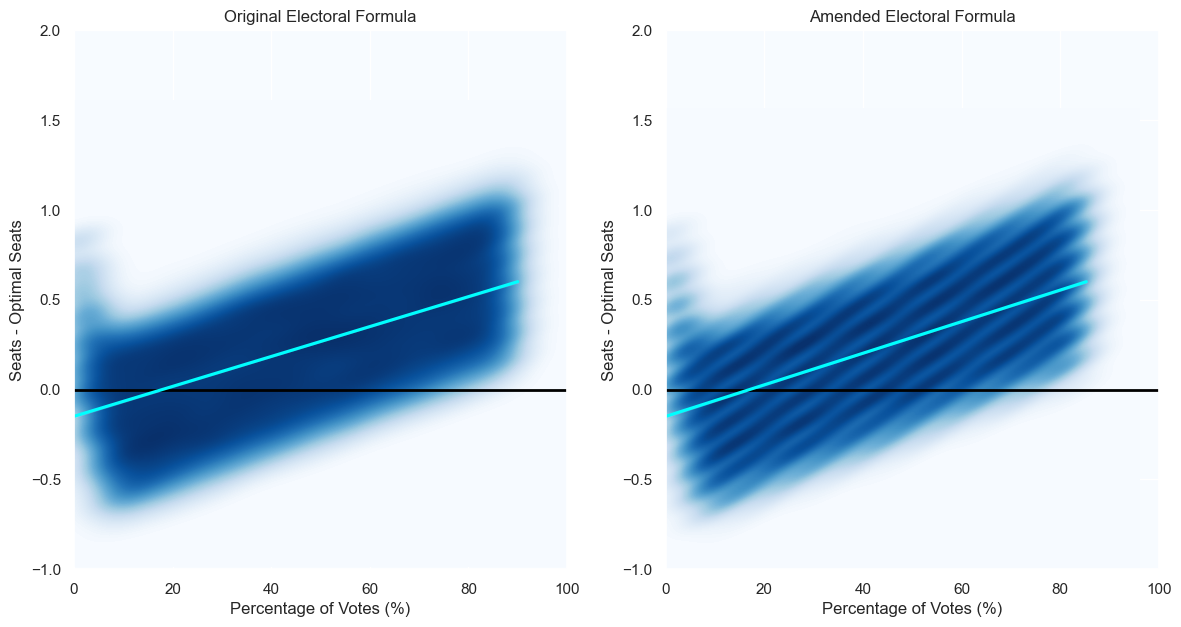

In [51]:
fig, axs = plt.subplots(1,2, figsize=(14, 7))

cmap = matplotlib.cm.get_cmap("Blues")
bg_color = cmap(0)    
    
kde_kwargs = {
    "x": "perc_votes",
    "y": "seat_diff",
    "fill": True,
    "cmap": "Blues",
    "levels": 500,
    "thresh": 0
}

reg_kwargs = {
    "x": "perc_votes",
    "y": "seat_diff",
    "color": "aqua",
    "scatter": False
}

axs[0].set_title("Original Electoral Formula")
axs[1].set_title("Amended Electoral Formula")

sns.kdeplot(data=orig_p1_data, ax=axs[0], **kde_kwargs)
sns.kdeplot(data=amend_p1_data, ax=axs[1], **kde_kwargs)

for ax in axs:
    sns.lineplot(x=[0,100], y=[0,0], ax=ax, color='black', linewidth=2)

sns.regplot(data=amend_p1_data, ax=axs[1], **reg_kwargs)
sns.regplot(data=orig_p1_data, ax=axs[0], **reg_kwargs)
    
for ax in axs:
    ax.set_facecolor(bg_color)
    ax.set_xlim(0, 100)
    ax.set_ylim(-1, 2)
    ax.set_xlabel("Percentage of Votes (%)")

for ax in axs:
    ax.set_ylabel("Seats - Optimal Seats")
# axs[0].set_ylabel("Difference in Seats")
# axs[1].set_ylabel("Difference in Seats")

fig.savefig(f"{figs_path}/ip_bias.png")

In [49]:
no_decs = 3

o_corr = orig_p1_data["perc_votes"].corr(orig_p1_data["seat_diff"])
a_corr = amend_p1_data["perc_votes"].corr(amend_p1_data["seat_diff"])

print("Correlation Coefficients:")
print(f"\t Original: {o_corr.round(no_decs)}")
print(f"\t Ammended: {a_corr.round(no_decs)}")

Correlation Coefficients:
	 Original: 0.561
	 Ammended: 0.561


#### Ranges

In [ ]:
pv = orig_p1_data["perc_votes"] 
print("0% - 1%: ", orig_p1_data[(pv < 1)]["seat_diff"].mean().round(3))

In [ ]:
pv = orig_p1_data["perc_votes"] 
start, end = 0, 1
print(f"{start}% - {end}%: ", orig_p1_data[(pv >= start) & (pv <= end)]["seat_diff"].mean().round(3))

In [ ]:
pv = orig_p1_data["perc_votes"] 
start, end = 5, 6
print(f"{start}% - {end}%: ", orig_p1_data[(pv >= start) & (pv <= end)]["seat_diff"].mean().round(3))

In [ ]:
pv = orig_p1_data["perc_votes"] 
start, end = 9, 10
print(f"{start}% - {end}%: ", orig_p1_data[(pv >= start) & (pv <= end)]["seat_diff"].mean().round(3))

In [ ]:
pv = orig_p1_data["perc_votes"] 
start, end = 5, 10
print(f"{start}% - {end}%: ", orig_p1_data[(pv >= start) & (pv <= end)]["seat_diff"].mean().round(3))

In [ ]:
pv = orig_p1_data["perc_votes"] 
start, end = 85, 90
print(f"{start}% - {end}%: ", orig_p1_data[(pv >= start) & (pv <= end)]["seat_diff"].mean().round(3))

In [ ]:
pv = orig_p1_data["perc_votes"] 
start, end = 89, 90
print(f"{start}% - {end}%: ", orig_p1_data[(pv >= start) & (pv <= end)]["seat_diff"].mean().round(3))

In [ ]:
pv = orig_p1_data["perc_votes"] 
orig_p1_data[(pv >= 5) & (pv <= 6)]["seat_diff"].mean()

In [ ]:
pv = orig_p1_data["perc_votes"] 
orig_p1_data[(pv >= 5) & (pv <= 10)]["seat_diff"].mean()

In [ ]:
pv = orig_p1_data["perc_votes"] 
orig_p1_data[(pv >= 85) & (pv <= 90)]["seat_diff"].mean()

In [ ]:
pv = orig_p1_data["perc_votes"] 
orig_p1_data[(pv > 89) & (pv < 90)]["seat_diff"].mean()